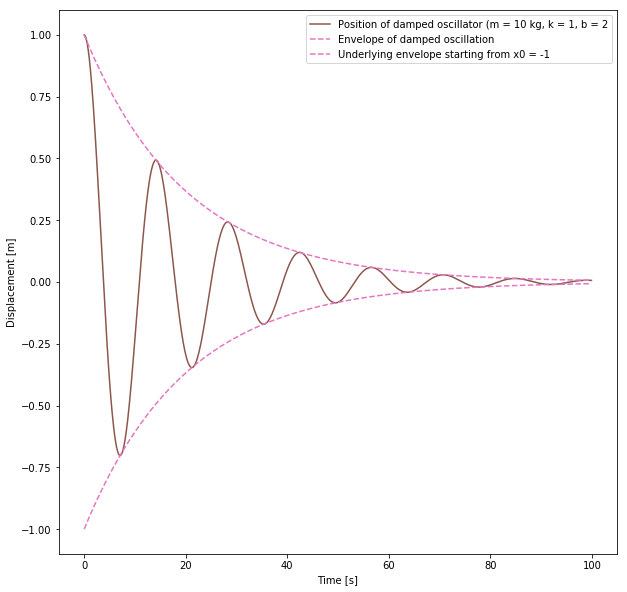

In [475]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.integrate import odeint

def f(z, t, params):
    x, y = z          # z = d^2x_dt^2
    gamma, omega0 = params          # Unpacks the parameters within the derivatives. The equations below
                           # will be dphi_dt = y, dy_dt = d^2phi_dt^2, 
    derivs = [y,
             -gamma*y - (omega0**2)*(x)]
    return derivs

# Parameters  
k = 2                    # spring constant [kg*s^-2]
m = 10                   # mass [kg]
b = 1                    # mass/fluid index (depends on viscosity) [N/(m/s) or kg/s]
omega0 = np.sqrt(k/m)    # Angular frequency [rad/s^2]
gamma = b/m              # Damping constant [rad/s]

# Initial values
x0 = 1
x1 = -1
t = 0                  

# Bundle parameters for ODE solver
params = [gamma, omega0]

#Bundle initial conditions, ensure that y0 is within a range [x, y, z...] otherwise ODEINT won't process it.
z0 = [x0, t]

#To ensure 3 periods are shown, t(0,15,0.1) is an acceptable domain.
tStop = 100
tInc = 0.1
t = np.arange(0, tStop, tInc)

# Call the ODE solver and assign f2 = phi2, psoln = phi1
psoln = odeint(f, z0, t, args=(params,))
x2 = (x0)*(np.e**(-(gamma*t/2)))
x3 = (x1)*(np.e**(-(gamma*t/2)))

# Plot phi as a function of time
fig = plt.figure(1, figsize=(10,10))
plt.plot(t, psoln[:,0], 'C5', label="Position of damped oscillator (m = 10 kg, k = 1, b = 2")
plt.plot(t, x2, 'C6--', label="Envelope of damped oscillation")
plt.plot(t, x3, 'C6--', label="Underlying envelope starting from x0 = -1")
plt.xlabel('Time [s]')
plt.ylabel('Displacement [m]')
plt.legend()

plt.show()